# **TP1 - Redes Neuronales 16.32**
## *Valentina Gonzalez - 59128*

### Librerías

In [228]:
!pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\vale_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

### Problema de Clasificación - Dataset Yeast 

#### Abro el dataset


Observando el yeast.names vemos que se trata de un CSV con un set de datos acerca de 1484 bacterias que pueden pertenecer a 10 clases distintas (ubicacion de las proteinas) y al que se le calcularon 9 atributos (8 predictivos y 1 nombre) 

In [230]:
path1 = '/Users/vale_/OneDrive/Documents/Redes Neuronales/yeast.data'
nombres_atributos = ['mcg','gvh','alm','mit','erl','pox','vac','nuc']
df = pd.read_csv(path1,names = nombres_atributos + ['clase'], sep='\s+')
print(df)

             mcg   gvh   alm   mit  erl  pox   vac   nuc clase
ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
...          ...   ...   ...   ...  ...  ...   ...   ...   ...
YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   ME2
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   NUC
ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   ME2
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   NUC
G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   CYT

[1484 rows x 9 columns]


#### EDA - Análisis exploratorio de datos

##### Balance de clases

In [231]:
print('Repetición de cada clase:\n')
df.clase.value_counts()

Repetición de cada clase:



CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: clase, dtype: int64

In [232]:
print('Balance de clases:\n')
df.clase.value_counts()/len(df)

Balance de clases:



CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: clase, dtype: float64

##### Análisis de datos

Observo los valores numéricos que pueden ser importantes, como la media, la desviación estándar y el recuento de los valores

In [233]:
df.describe()


,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


Los resultados anteriores nos permiten extraer ideas y tendencias clave acerca de los datos. Por ejemplo, de los datos proporcionados podríamos inferir que, en promedio, los valores más altos están en la columna MCG y ERL mientras que los más bajos están en la columna . 

##### Distribución de las clases

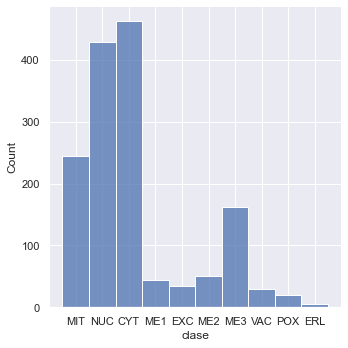

In [234]:
sns.set_theme()
sns.displot(df, x="clase")

Observo que las clases mas significativas son: CYT, NUC, MIT y ME3. Por ende, realizo el gráfico para observar la distribución de las 4 clases mencionadas por separado. 

##### Correlaciones de a pares de las variables e histogramas

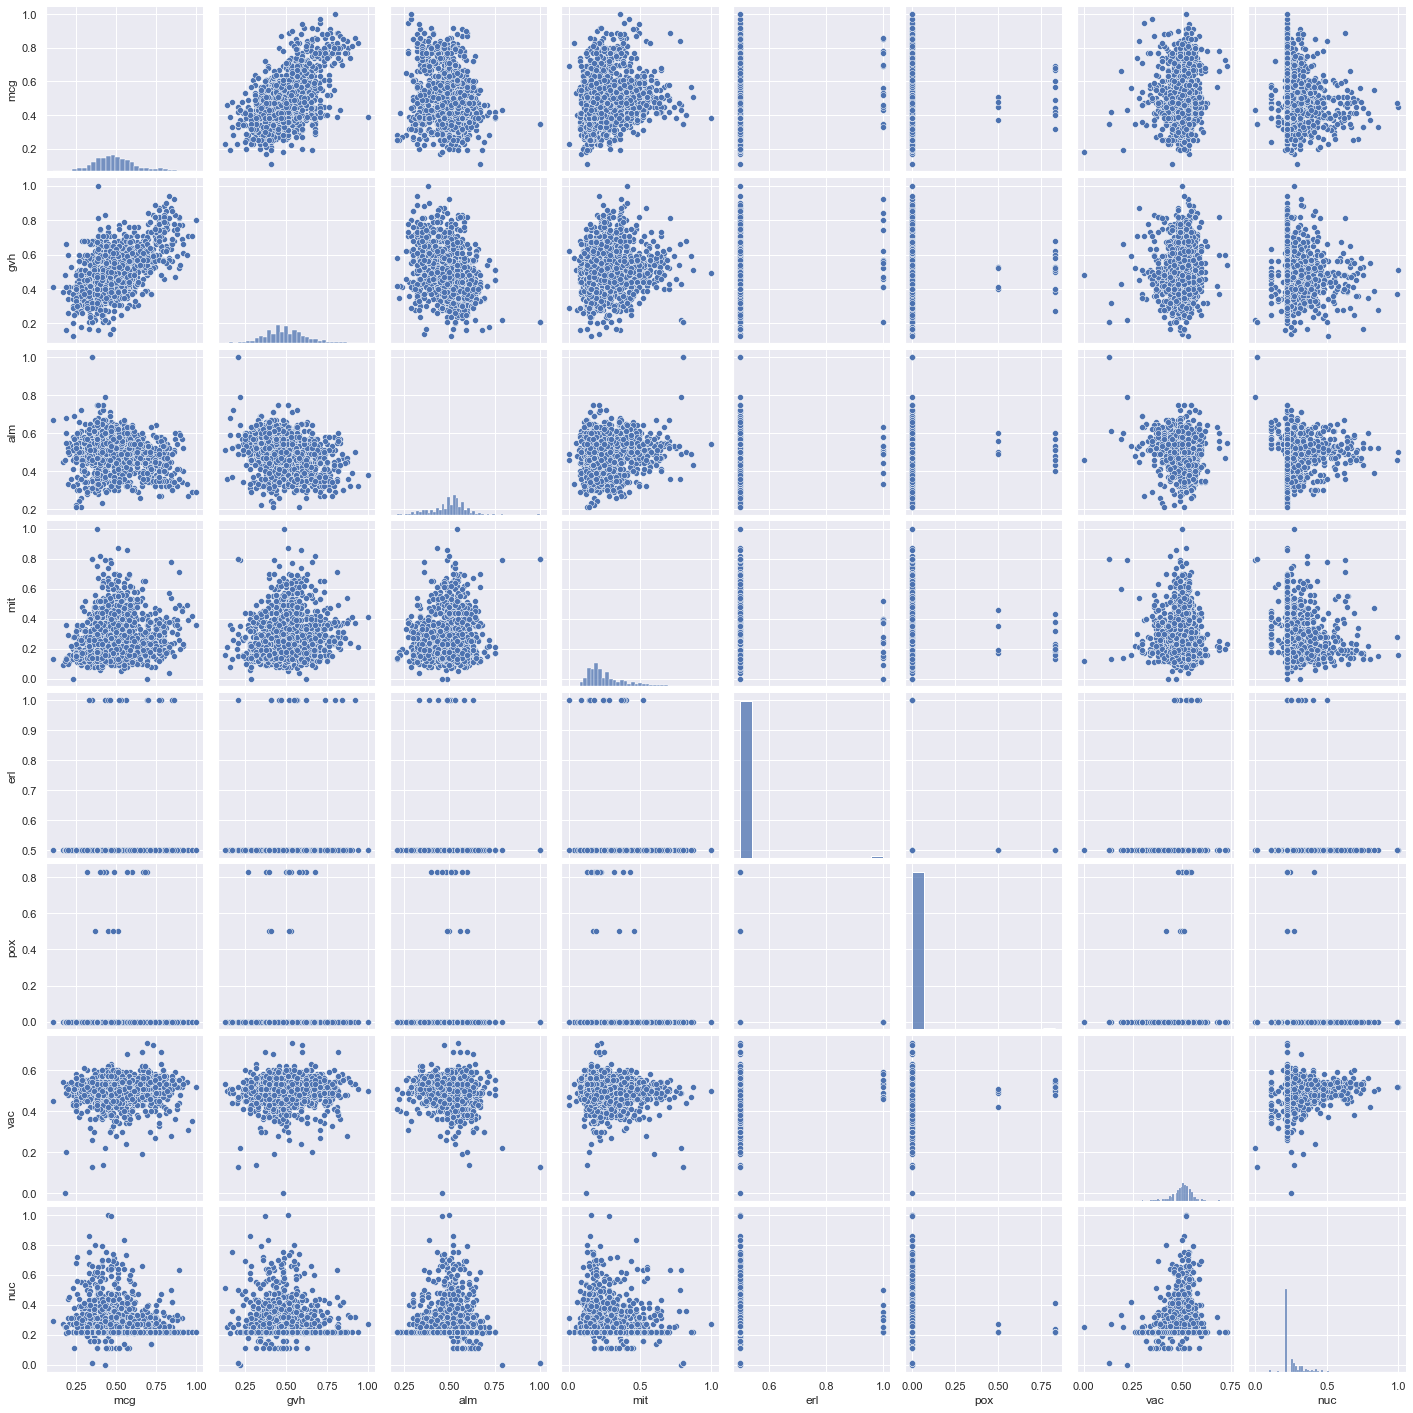

In [235]:
sns.pairplot(df, kind = 'scatter')

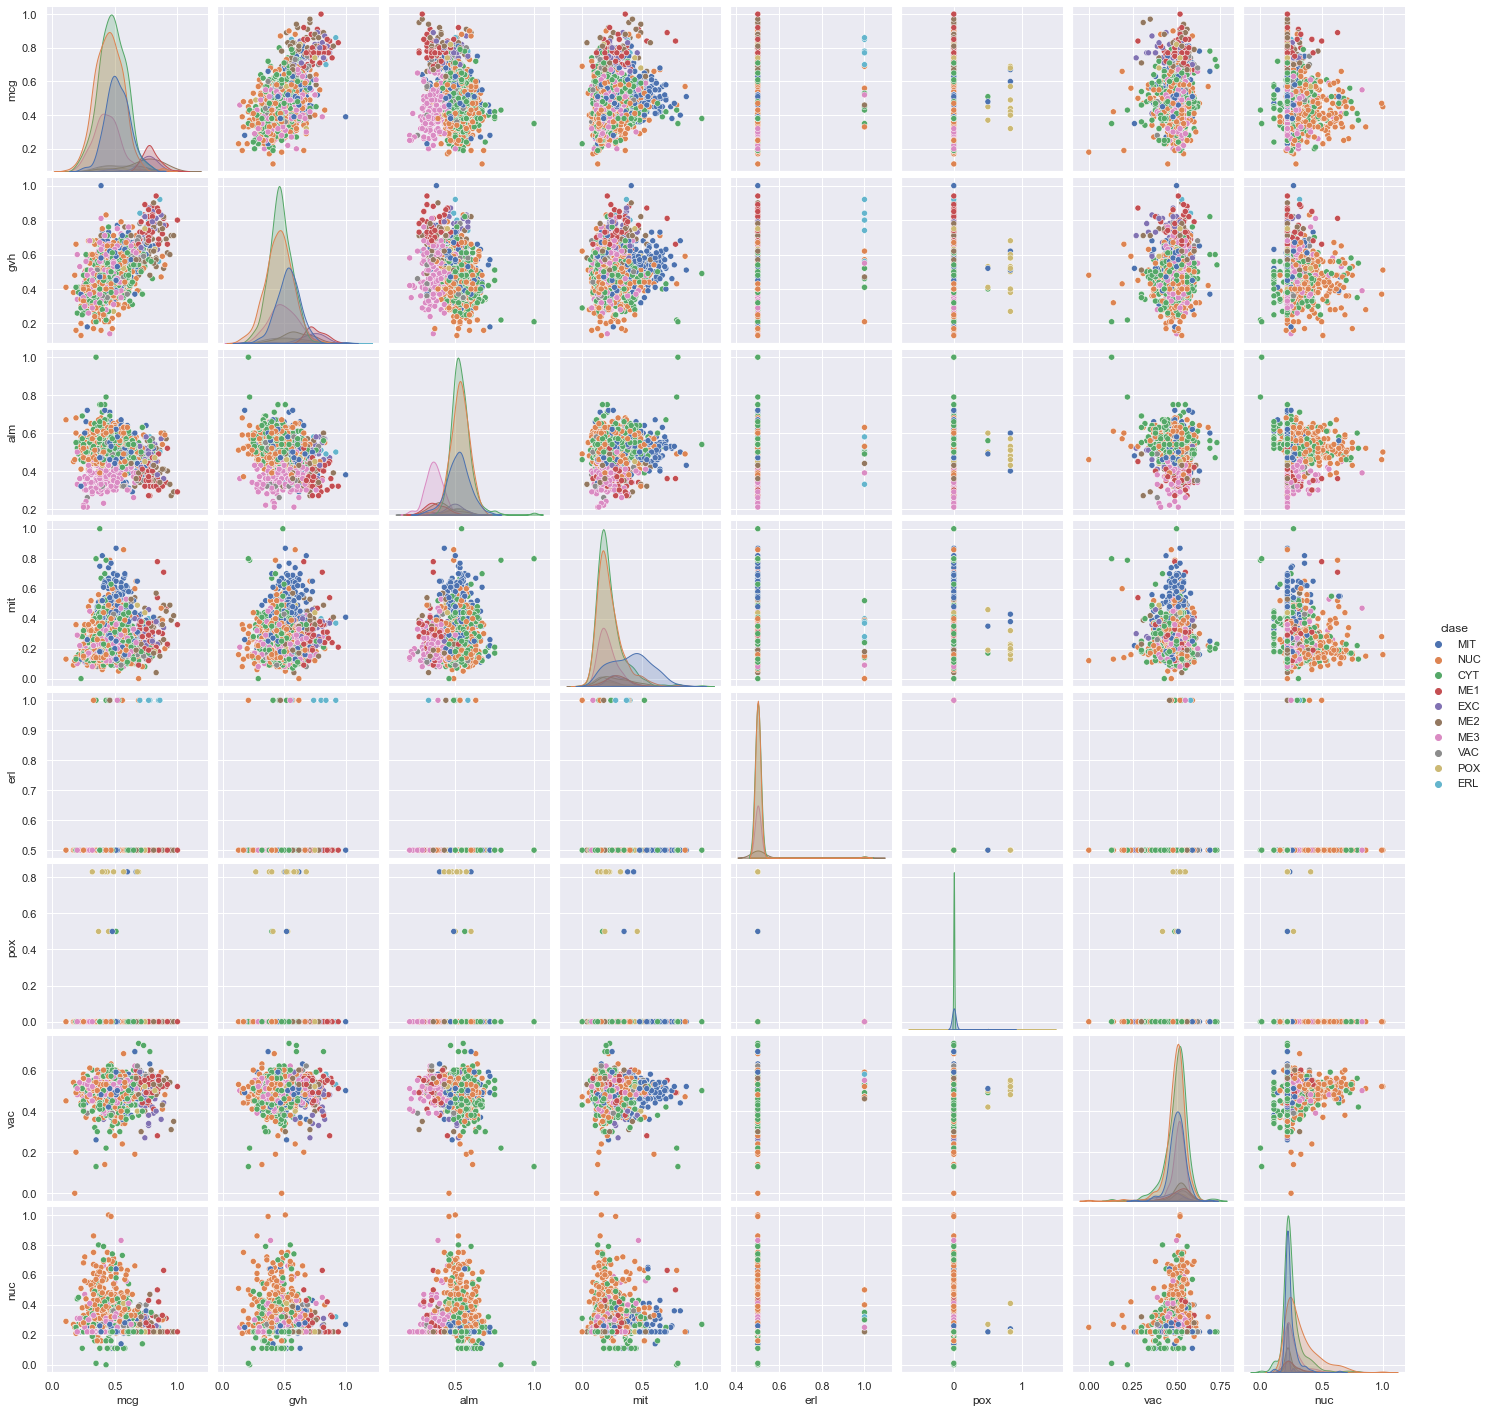

In [236]:
sns.pairplot(df, kind = 'scatter', hue='clase')

Vemos que las distribuciones estan bastante encimadas, en particular, no se observa ninguna separación clara entre los datos. 

#### Clasificación

Divido mi dataset en dos: 70% para train y 30% para test. 

In [237]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df["clase"], random_state=42)

In [238]:
df_train.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,clase
SWI6_YEAST,0.41,0.56,0.53,0.16,0.5,0.0,0.55,0.26,NUC
RPB3_YEAST,0.54,0.57,0.55,0.18,0.5,0.0,0.50,0.22,NUC
CBP1_YEAST,0.45,0.45,0.50,0.60,0.5,0.0,0.49,0.22,MIT
YB52_YEAST,0.58,0.50,0.50,0.12,0.5,0.0,0.48,0.25,NUC
DPOE_YEAST,0.37,0.48,0.50,0.26,0.5,0.0,0.52,0.39,NUC


##### Modelo de Regresión Logistica

In [239]:
enc = LabelEncoder()

In [240]:
keys = ["mcg","alm","gvh","mit","nuc"]
y = enc.fit_transform(df_train.clase.values)
y_test = enc.transform(df_test.clase.values)

In [241]:
clf = LogisticRegression()
clf.fit(df_train[keys].values, y)

LogisticRegression()

In [242]:
clf.score(df_train[keys].values, y)

0.5481695568400771

Chequeamos el overfitting

In [243]:
clf.score(df_test[keys].values, y_test)

0.5493273542600897

A modo de conclusión, vemos que, comparando previamente con lo obtenido en el balance de clases, el modelo predice con un score alto las clases.

### Problema de Regresión - Physicochemical Properties of Protein Tertiary Structure Data Set 

#### Abro el dataset

Observando el casp.csv vemos que se trata de un set de datos acerca de características fisico-químicas de las proteinas que contiene 9 atributos

In [247]:
path2= '/Users/vale_/OneDrive/Documents/Redes Neuronales/CASP.csv'
nombres_atributos2 = ['Size','F1','F2','F3','F4','F5','F6','F7','F8','F9']
df2 = pd.read_csv(path2,names = nombres_atributos2, sep=',')
print(df2)

         Size       F1       F2       F3       F4            F5       F6  \
0        RMSD       F1       F2       F3       F4            F5       F6   
1      17.284  13558.3  4305.35  0.31754  162.173   1872790.507  215.359   
2       6.021  6191.96  1623.16  0.26213  53.3894   803446.6966  87.2024   
3       9.275  7725.98  1726.28  0.22343  67.2887  1075647.5703  81.7913   
4      15.851  8424.58  2368.25  0.28111  67.8325  1210471.6295  109.439   
...       ...      ...      ...      ...      ...           ...      ...   
45726   3.762  8037.12  2777.68   0.3456   64.339  1105796.8388  112.746   
45727   6.521  7978.76  2508.57   0.3144  75.8654  1116724.8701  102.277   
45728  10.356  7726.65  2489.58   0.3222  70.9903  1076560.4462  103.678   
45729   9.791  8878.93  3055.78  0.34416  94.0314  1242266.0314  115.195   
45730  18.827  12732.4  4444.36  0.34905   157.63  1788896.9474  229.459   

            F7   F8       F9  
0           F7   F8       F9  
1      4287.87  102  27.0

#### EDA - Análisis exploratorio de datos

##### Balance de clases

In [248]:
print('Repetición de cada clase:\n')
df2.Size.value_counts()

Repetición de cada clase:



0         272
2.006      24
1.787      24
1.9        21
1.811      20
         ... 
13.71       1
11.032      1
5.194       1
9.567       1
17.435      1
Name: Size, Length: 15904, dtype: int64